In [1]:
# Imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Image upload 

In [2]:
# upload image
import os
from google.colab import files
import shutil

file_name = ''
upload_folder = 'upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  file_name = filename
  shutil.move(filename, dst_path)

Saving sample1.jpeg to sample1.jpeg
move sample1.jpeg to upload/sample1.jpeg


## Color filtering

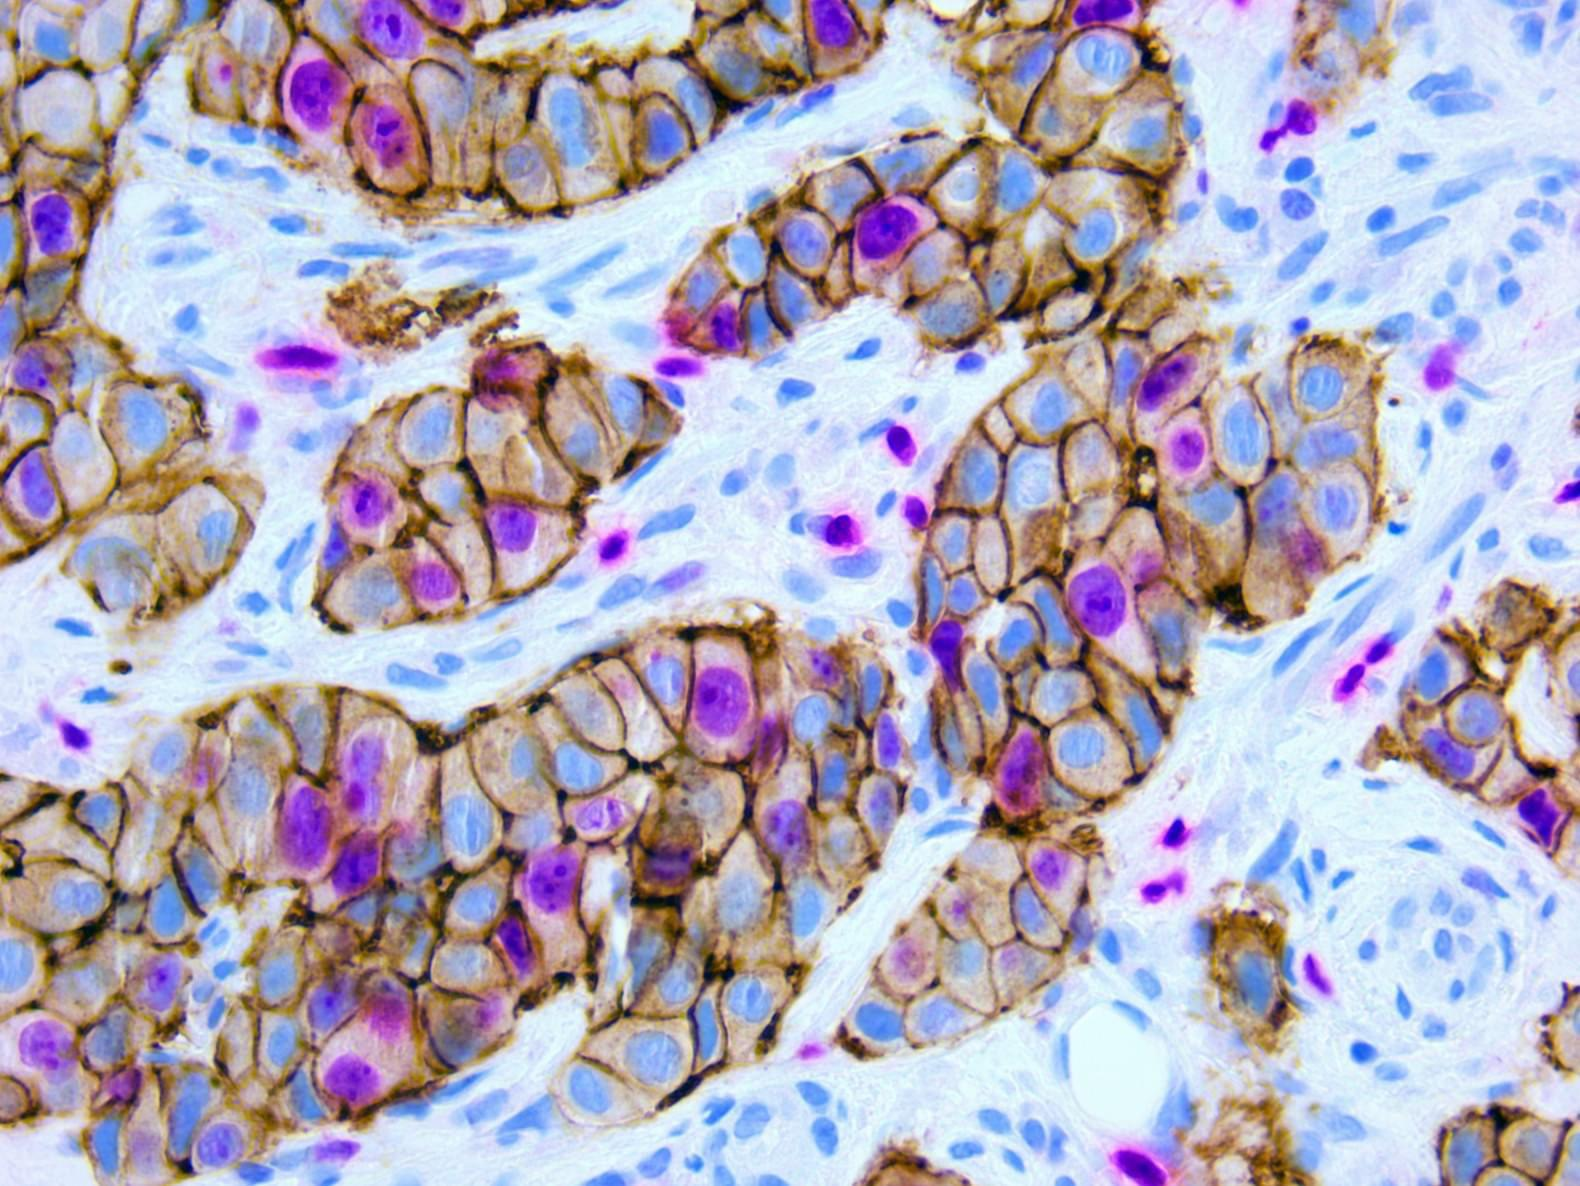

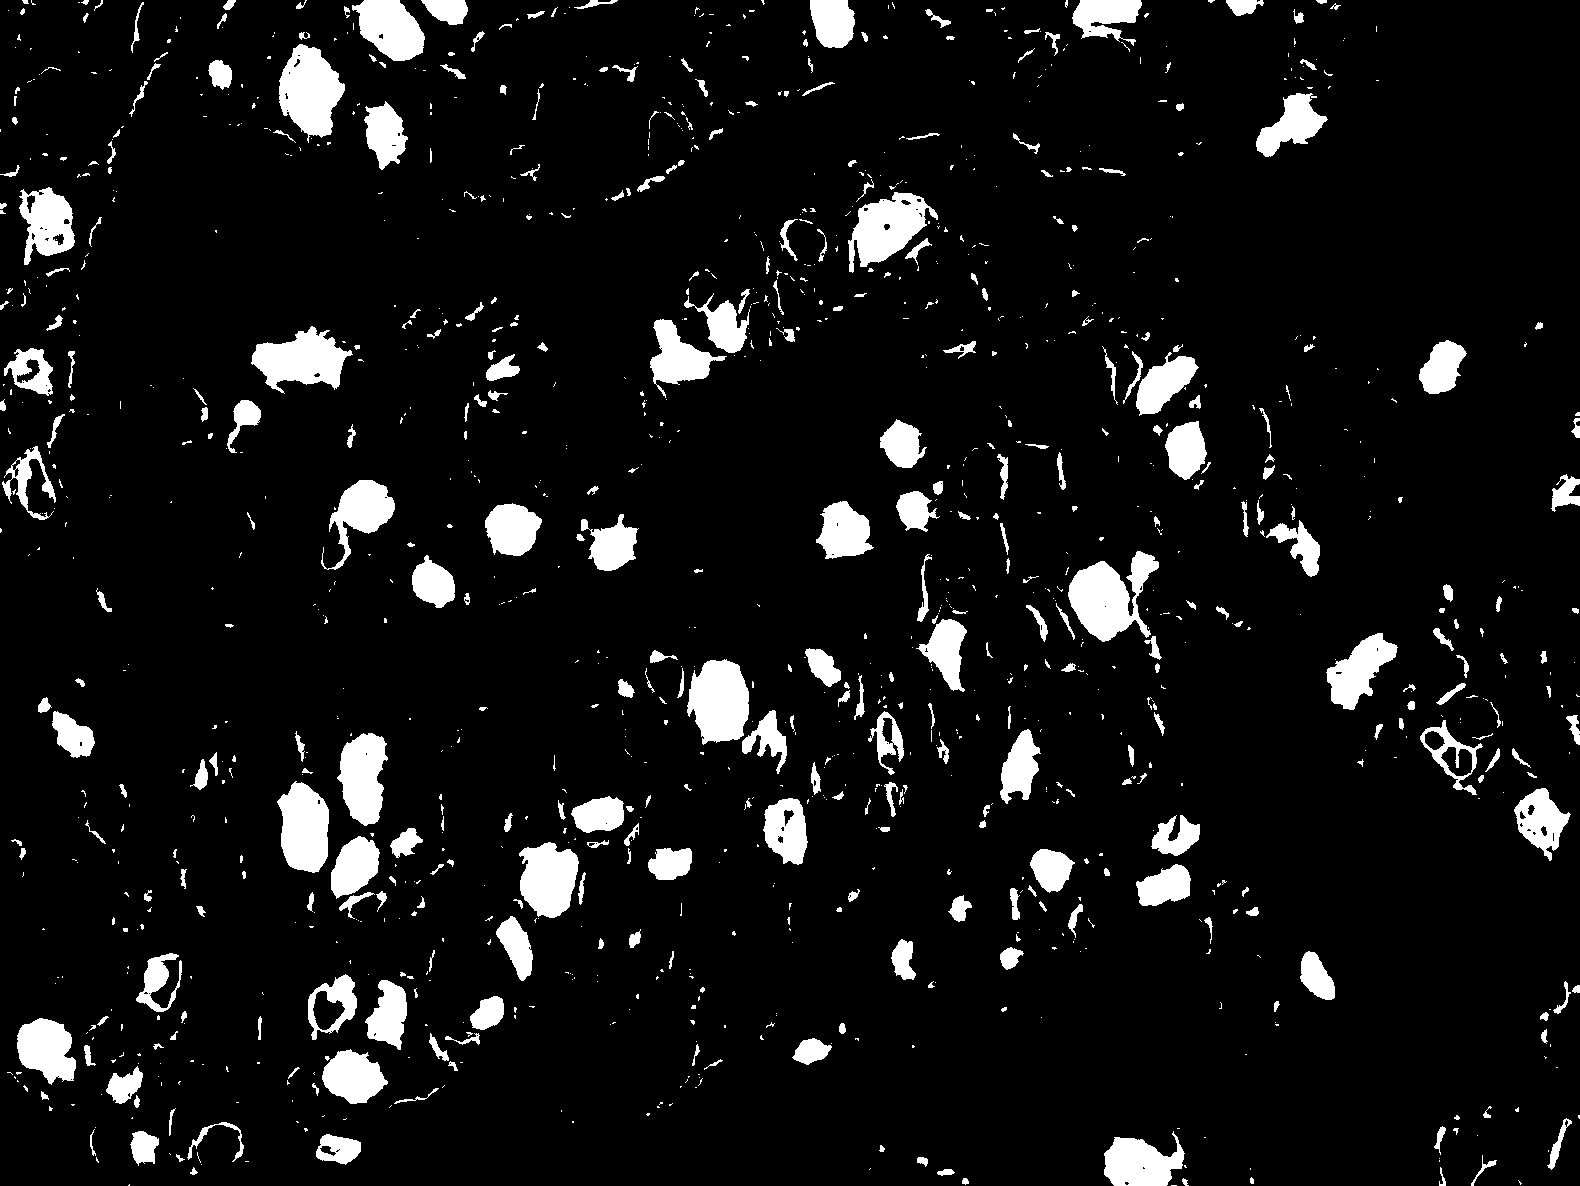

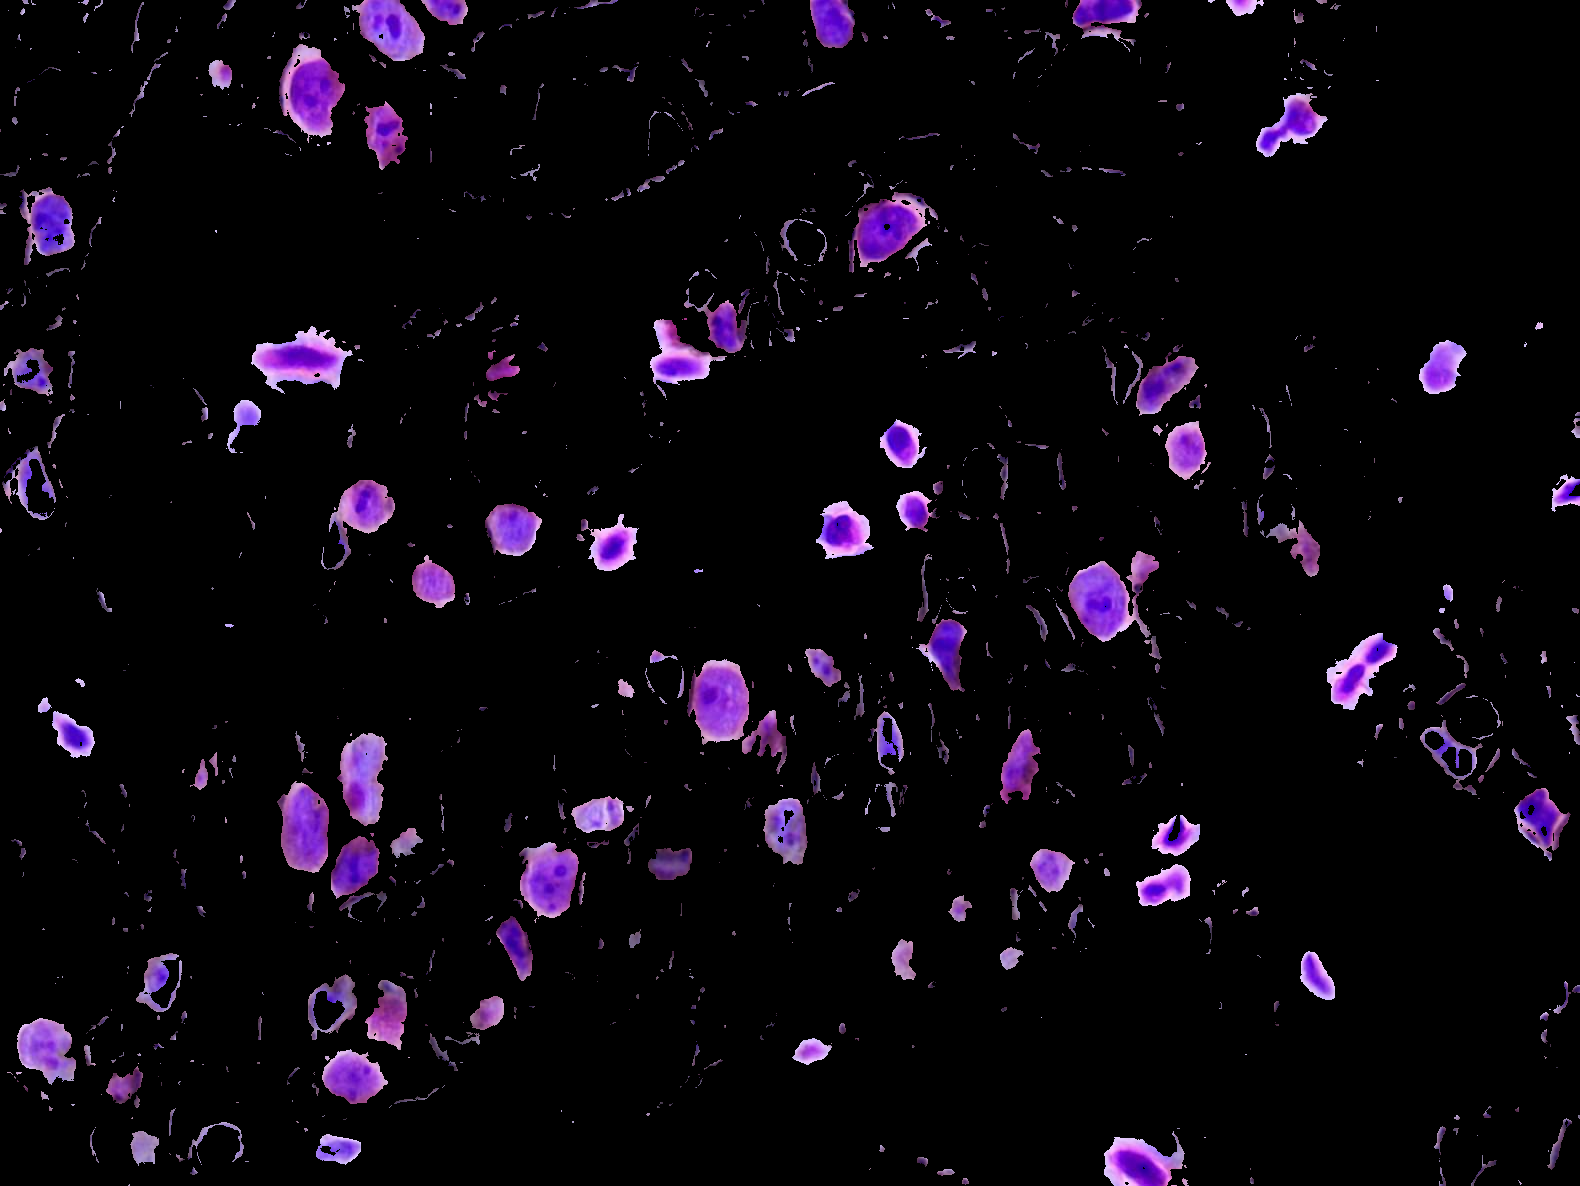

In [26]:
frame = cv2.imread('upload/' + filename)

# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
# Threshold of purple in HSV space
upper_purple = np.array([158, 255, 255])
lower_purple = np.array([129, 50, 70])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_purple, upper_purple)
    
# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(frame, frame, mask = mask)

cv2_imshow(frame)
cv2_imshow(mask)
cv2_imshow(result)

## Contour detection using OpenCv

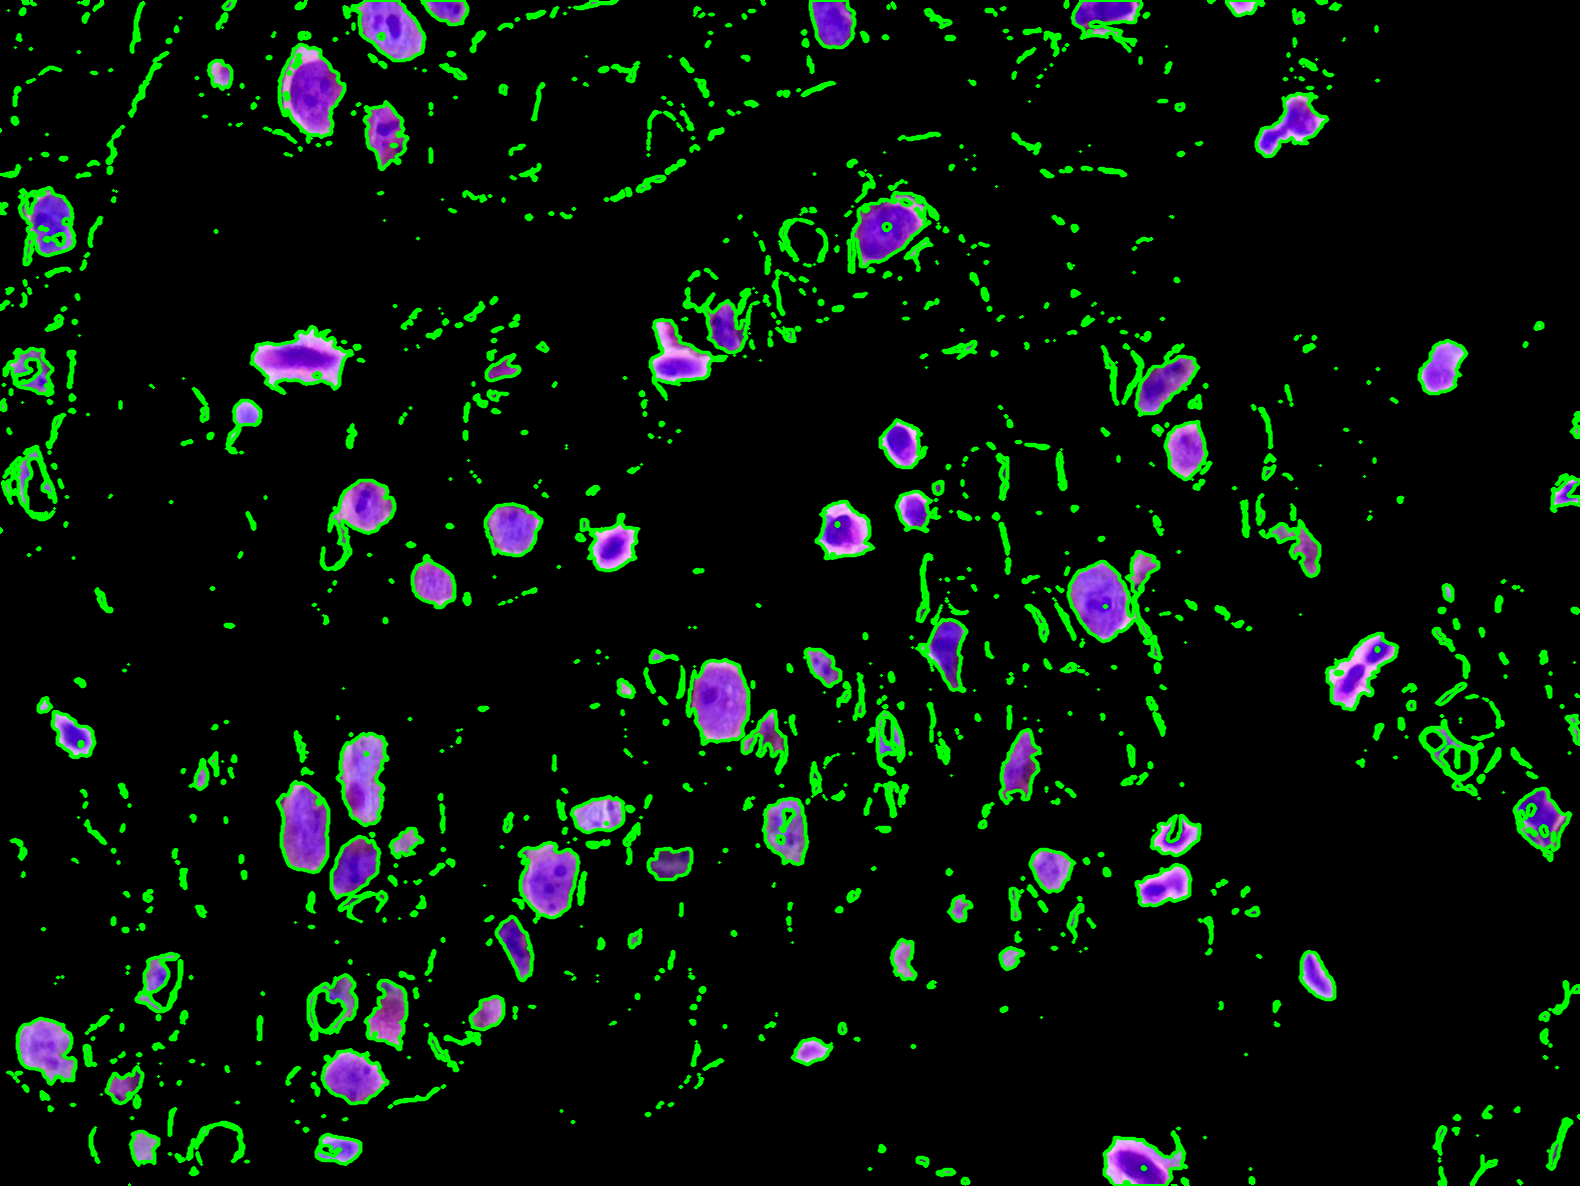

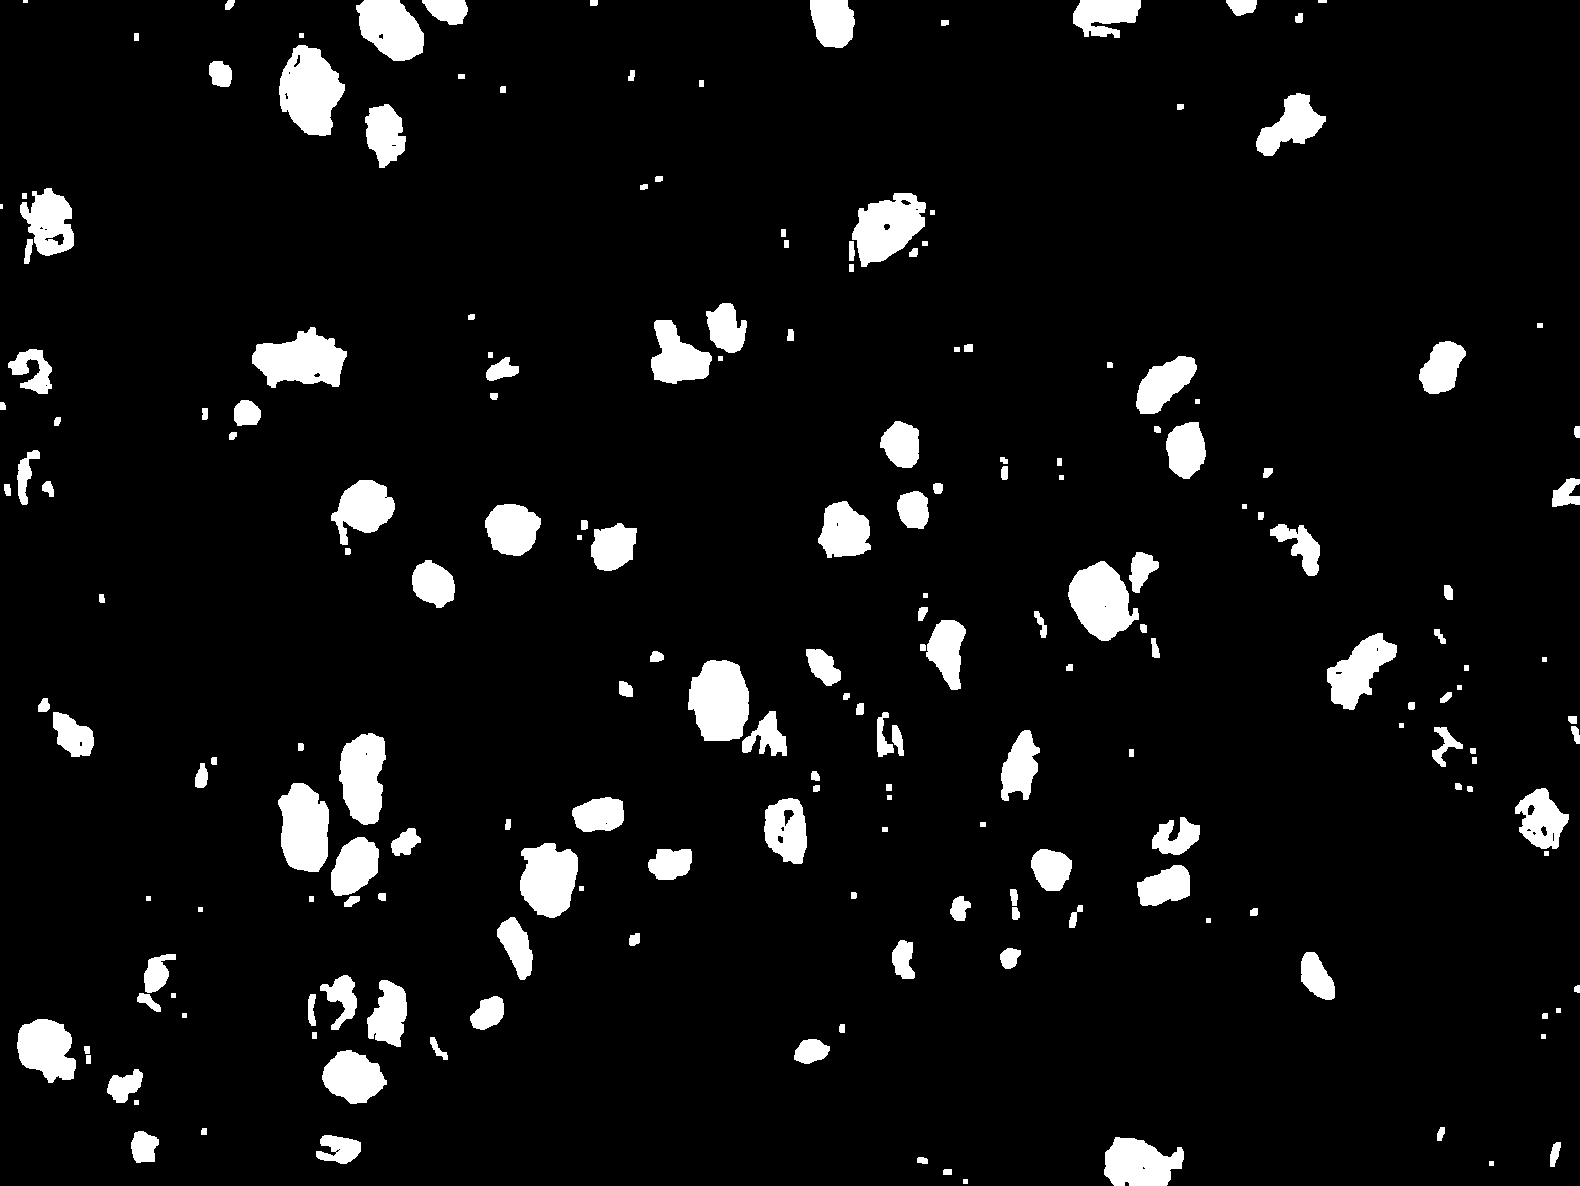

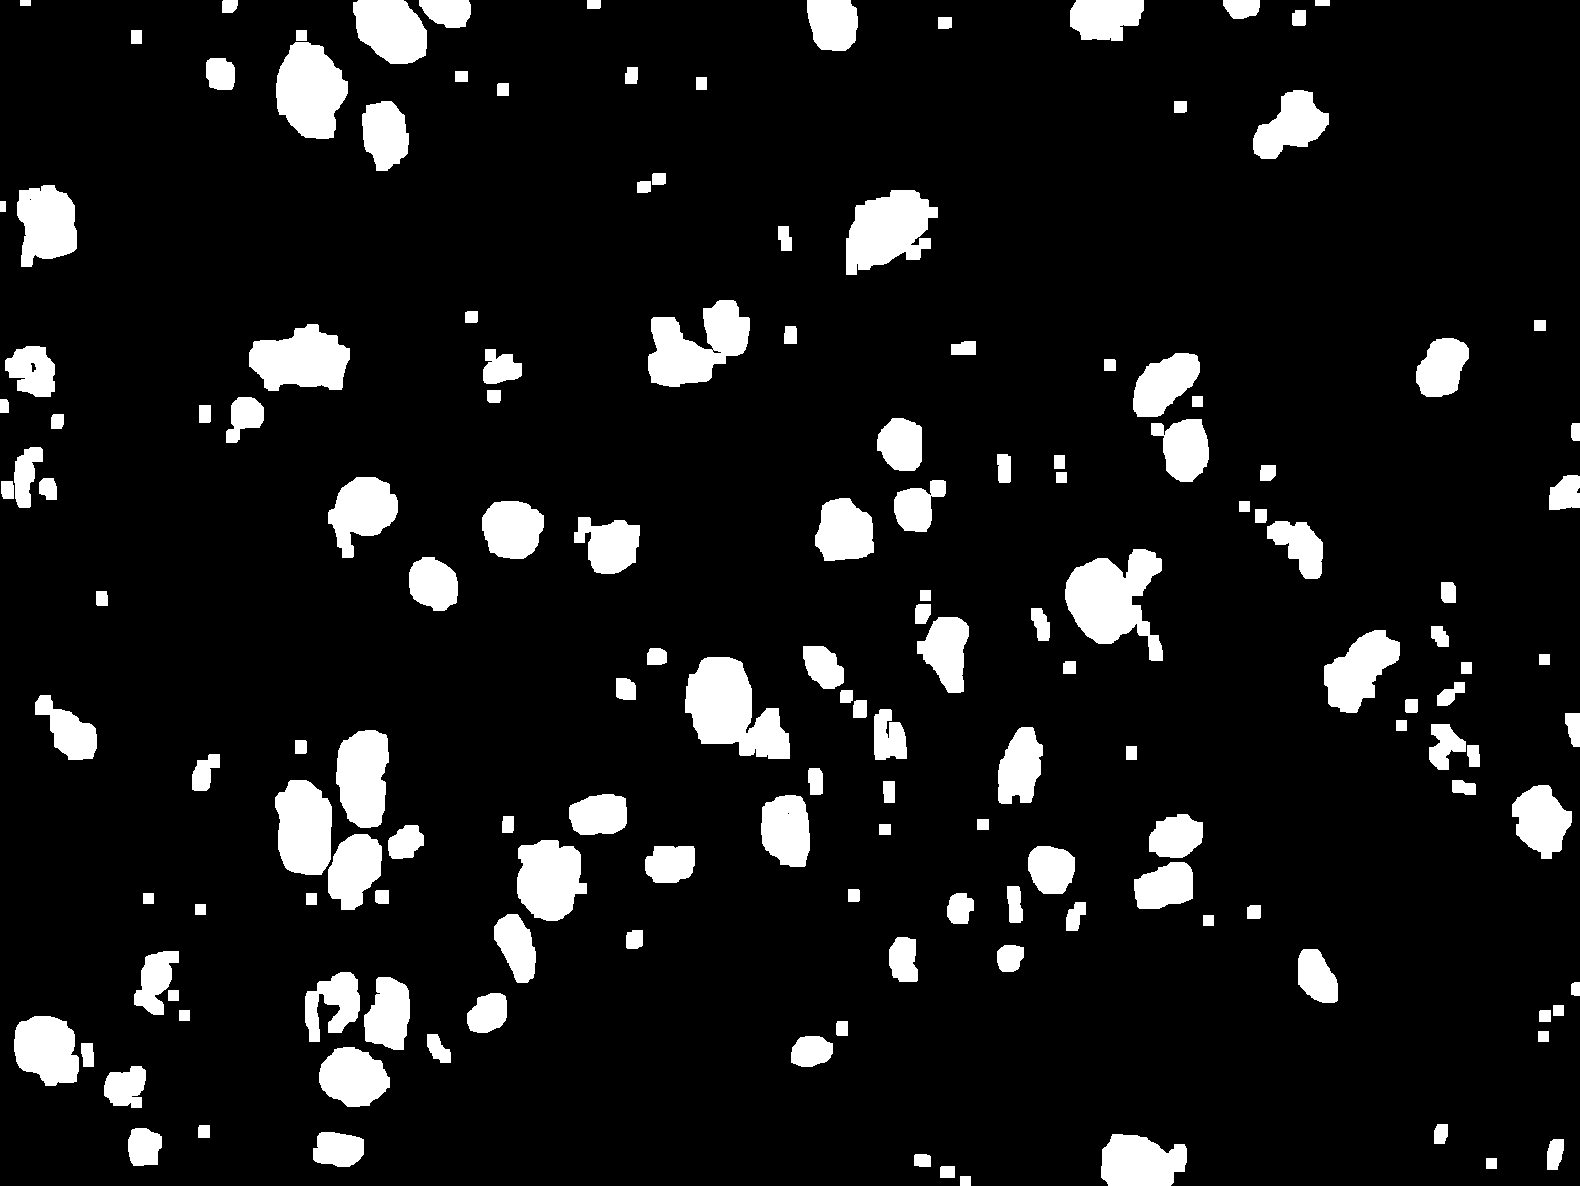

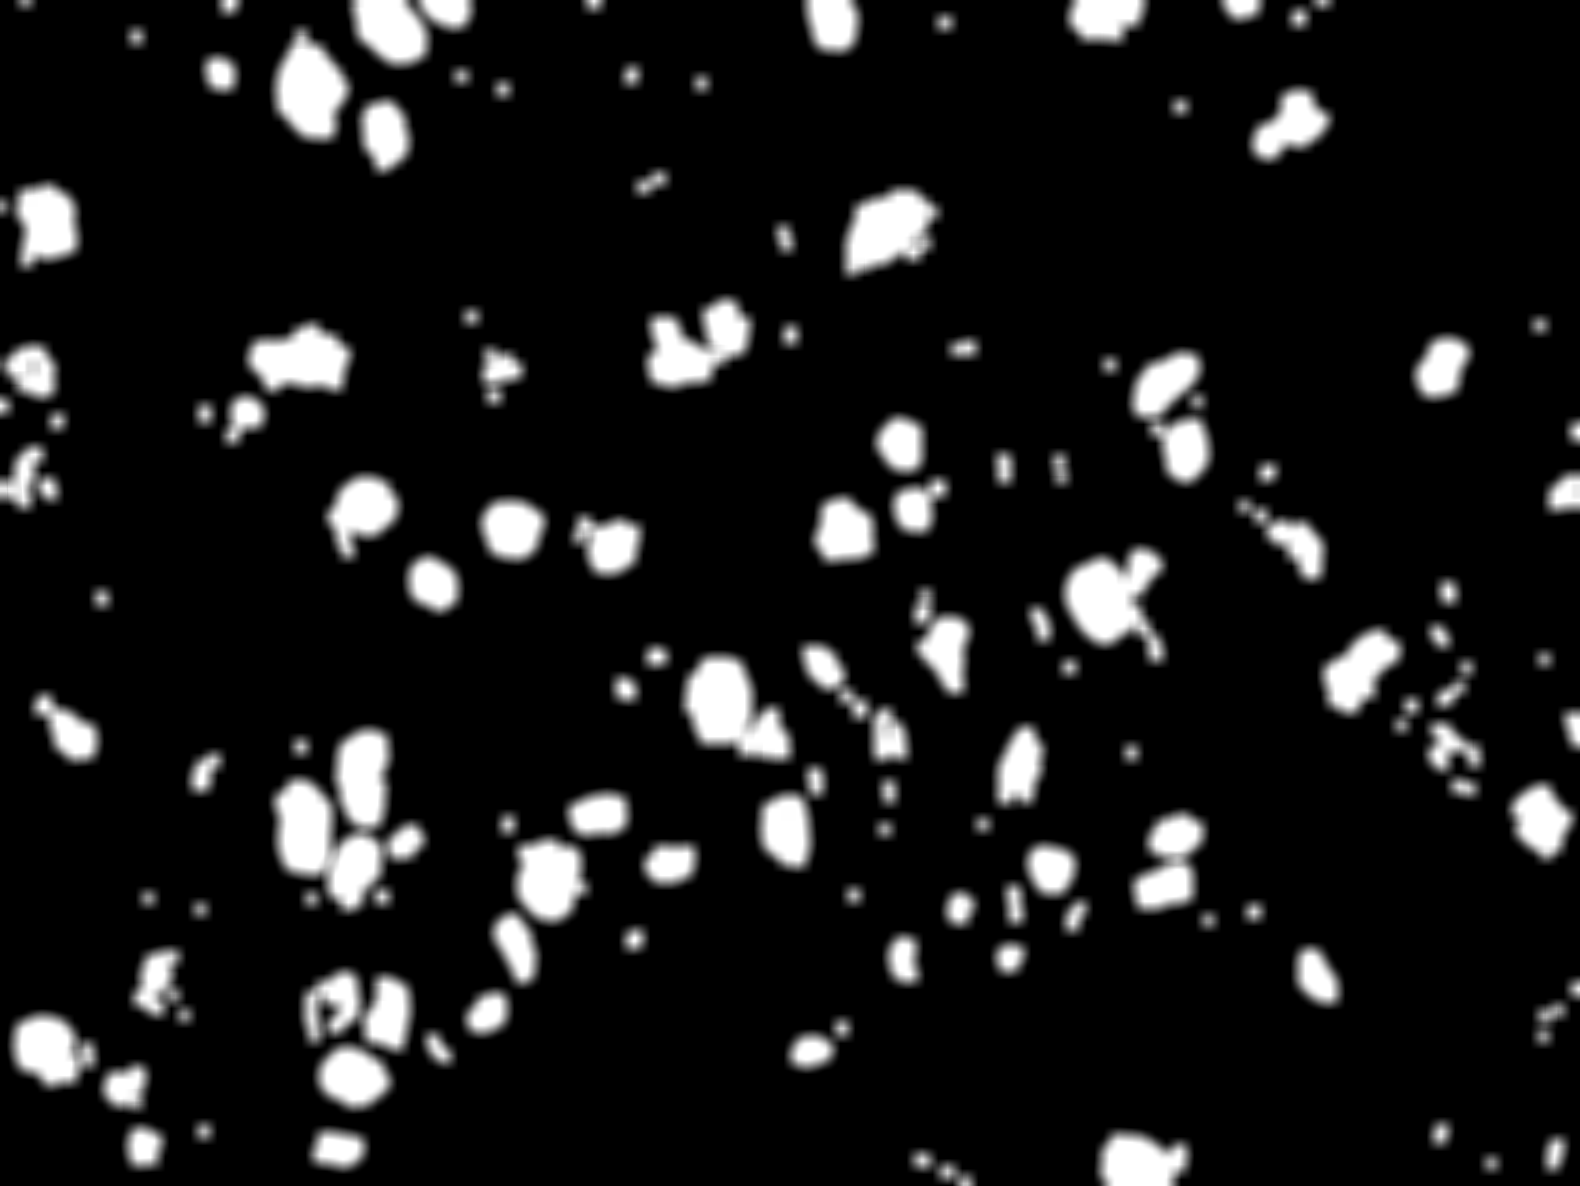

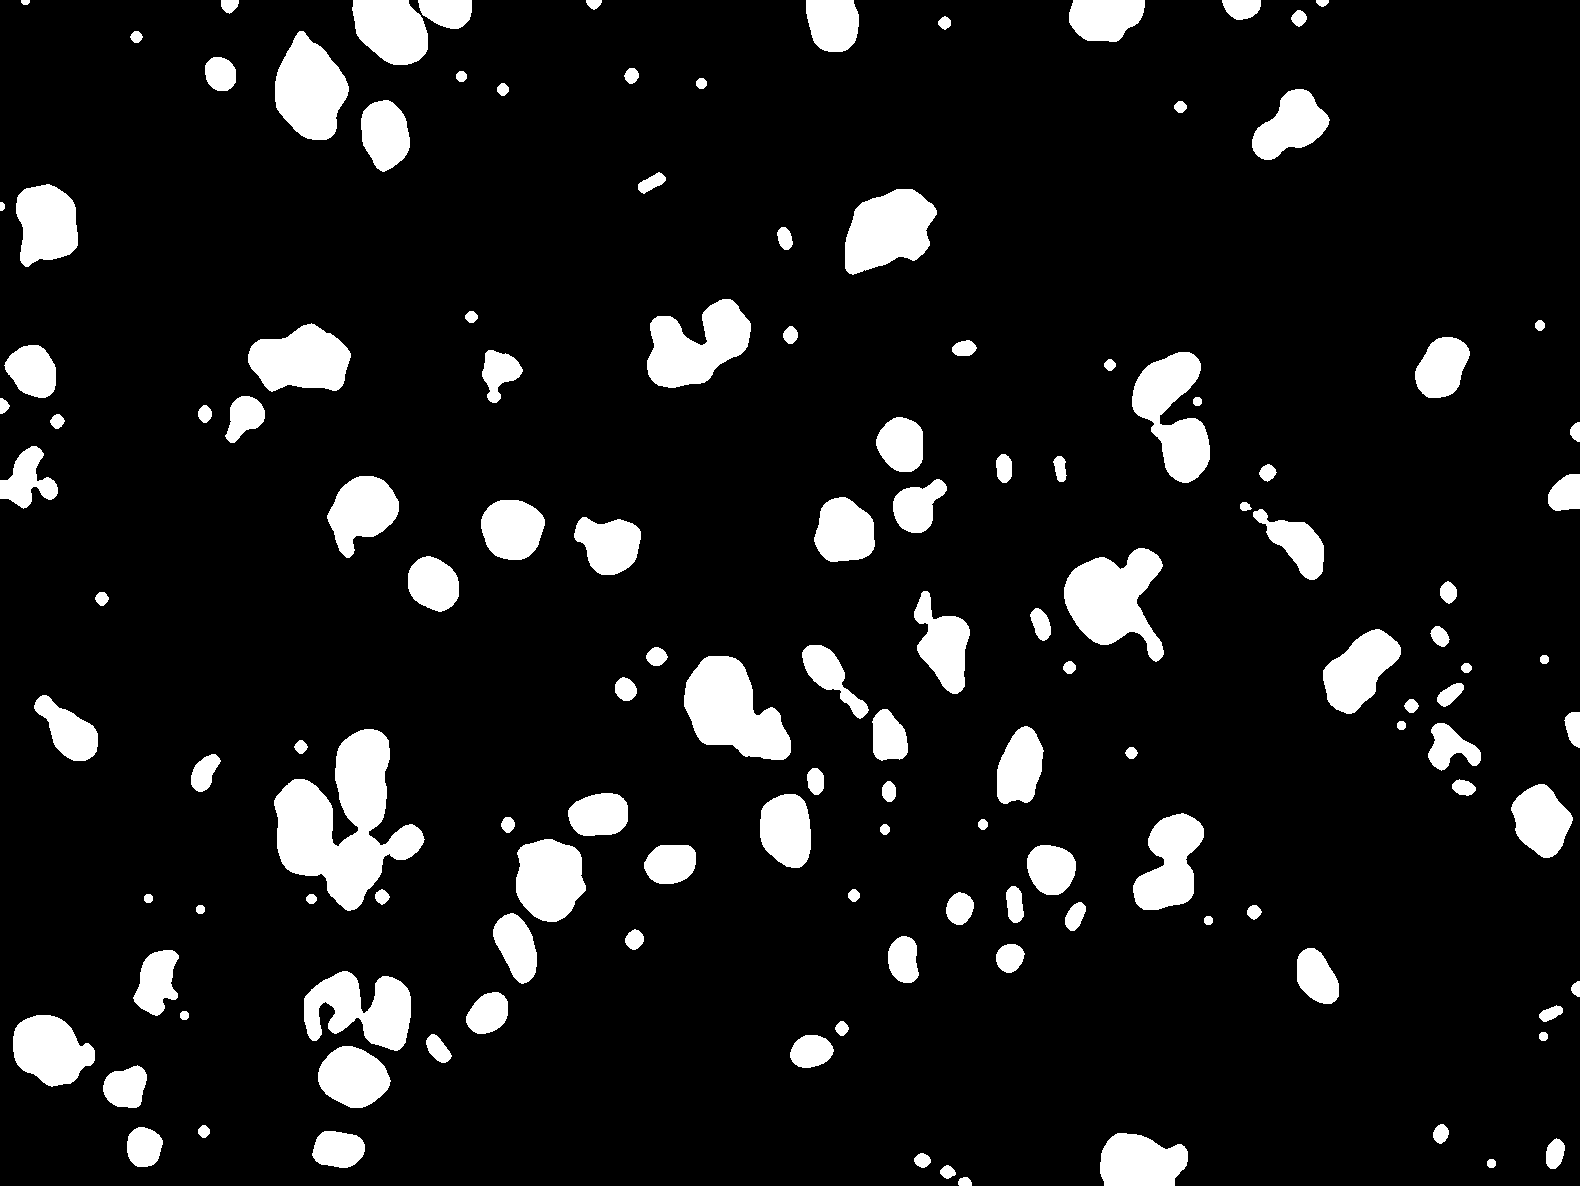

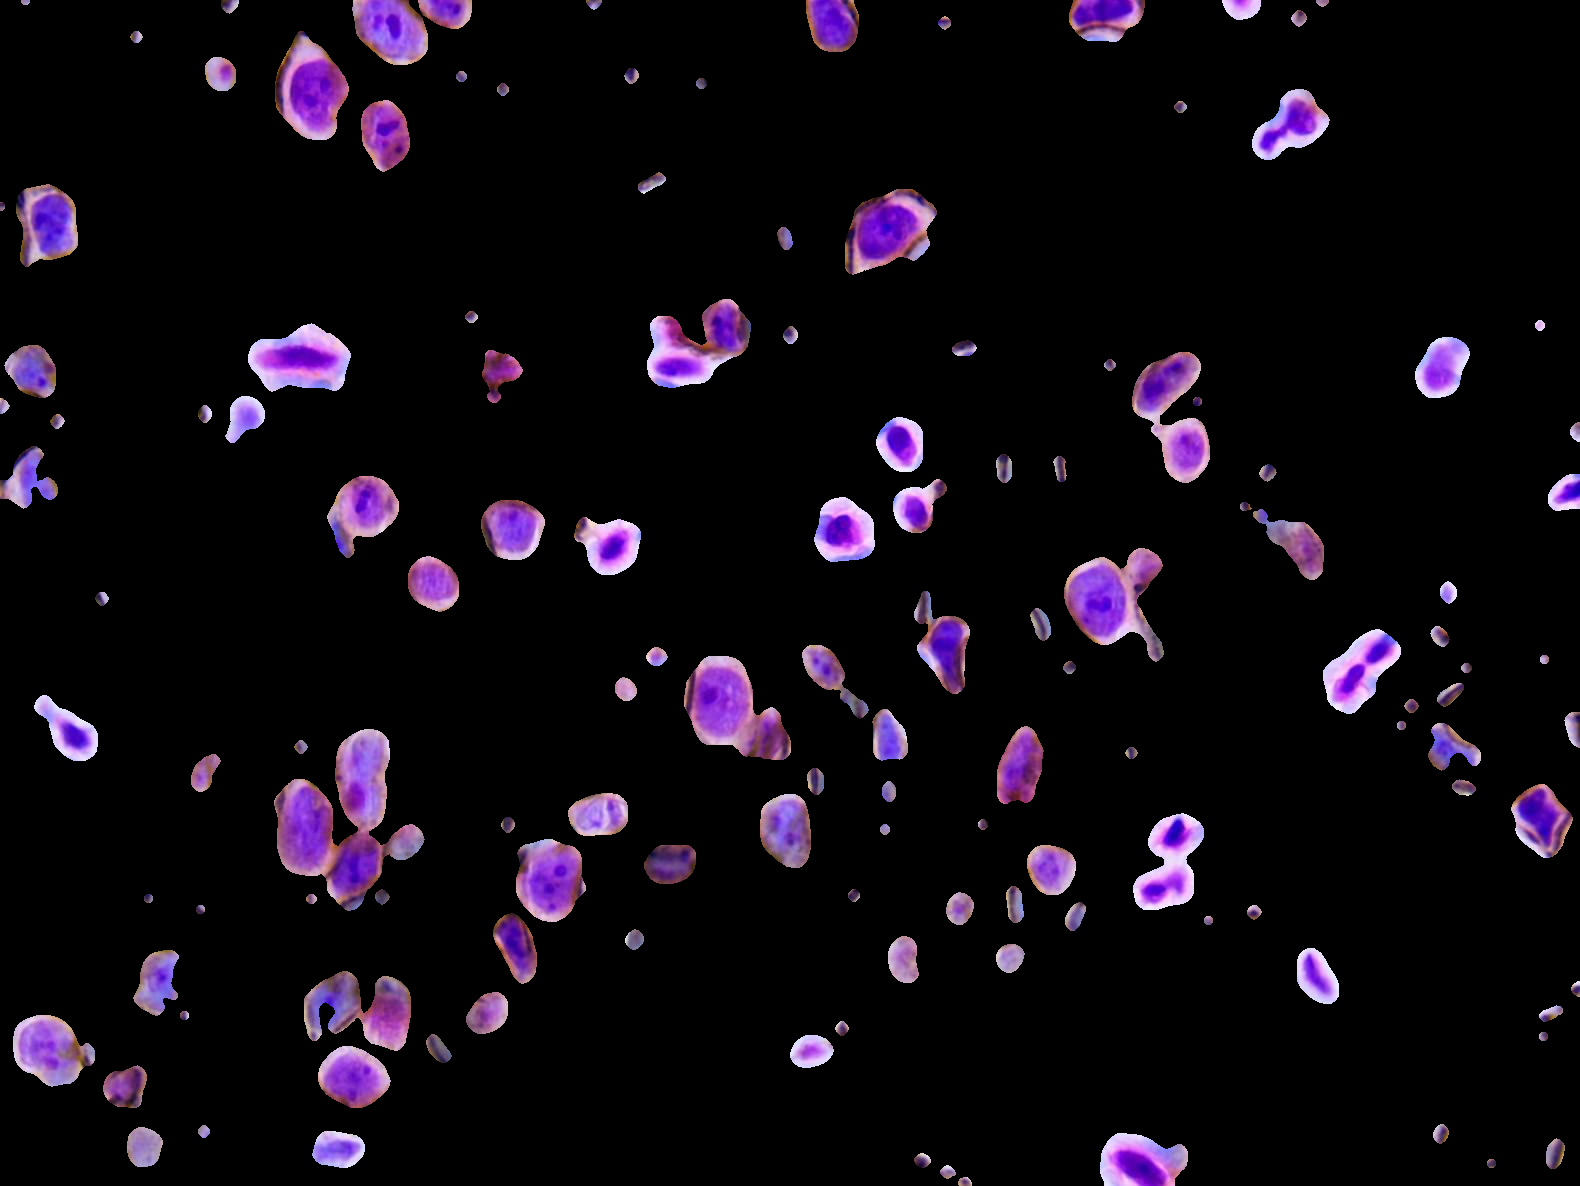

True

In [32]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=mask, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image

image_copy = result.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2_imshow(image_copy)

# remove smaller thin contours
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel, iterations = 2)

cv2_imshow(opening)

# combine noise with ROI
kernerl = np.ones((5,5),np.uint8)
dilate = cv2.dilate(opening,kernel,iterations=3)

cv2_imshow(dilate)

blur = cv2.blur(dilate,(15,15))
cv2_imshow(blur)

ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2_imshow(thresh)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# cnt = max(contours, key=cv2.contourArea)

h, w = frame.shape[:2]
new_mask = np.zeros((h, w), np.uint8)

cv2.drawContours(new_mask, contours, -1, 255, -1)
res = cv2.bitwise_and(frame, frame, mask=new_mask)

cv2_imshow(res)
cv2.imwrite('upload/sample_out2.png', res)
cv2.imwrite('upload/sample_out1.png', result)
